#### ANOVA

Todos los datos, por parámetro y los dos días

### Se importan las librerias

In [1]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Se cargan los datos

In [2]:
datos = pd.read_csv("data/data_all.csv", sep=";")

datos

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


### Número de grupos, observaciones por grupo y distribución de las observaciones

In [3]:
# Número de observaciones por grupo
datos.groupby('concentration').size()

concentration
0.0    182
0.4    146
1.5    150
3.0    148
dtype: int64

In [4]:
# Se balancean el número de observaciones por grupo (técnica resample)
from sklearn.utils import resample

data00 = datos[datos['concentration'] == 0.0]
data04 = datos[datos['concentration'] == 0.4] # Base del resample 146 registros
data15 = datos[datos['concentration'] == 1.5]
data30 = datos[datos['concentration'] == 3.0]

data_resample_00 = resample(data00,
                            replace = True,
                            n_samples = 146,
                            random_state= 1)

data_resample_15 = resample(data15,
                            replace = True,
                            n_samples = 146,
                            random_state= 1)

data_resample_30 = resample(data30,
                            replace = True,
                            n_samples = 146,
                            random_state= 1)

datos2 = pd.concat([data_resample_00, data04, data_resample_15, data_resample_30])

datos2['concentration'].value_counts()


0.0    146
0.4    146
1.5    146
3.0    146
Name: concentration, dtype: int64

In [5]:
# Media y desviación típica por grupo
datos.groupby('concentration').agg(['mean','std'])

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_13957/1821354023.py:2: FutureWarning: ['date', 'date(m/d/y)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  datos.groupby('concentration').agg(['mean','std'])


time                 day           chloride_80ft(mg/L)  \
                    mean       std      mean       std                mean   
concentration                                                                
0.0            13.219505  1.801482  1.510989  0.501258           16.231978   
0.4            12.232534  1.297871  1.500000  0.501721           16.247877   
1.5            14.233667  0.854822  1.500000  0.501675           16.513533   
3.0            15.916554  0.855403  1.506757  0.501652           16.565743   

                        chloride_1100ft(mg/L)           difference_chloride  \
                    std                  mean       std                mean   
concentration                                                                 
0.0            0.239536             17.208352  0.492617            0.976374   
0.4            0.250189             17.231027  0.297888            0.983151   
1.5            0.232374             17.441267  0.535817            0.927733   
3.0            0.250227             17.438581  0.619067            0.872838   

                         ... sp_cond_YSI_1100ft(µS/cm)            \
                    std  ...                      mean       std   
concentration            ...                                       
0.0            0.519210  ...                285.906593  2.153517   
0.4            0.507066  ...                285.931507  2.076660   
1.5            0.678965  ...                285.973333  2.151780   
3.0            0.688168  ...                286.358108  2.499007   

              difference_sp_cond_YSI           turbidity_YSI_80ft(NTU+)  \
                                mean       std                     mean   
concentration                                                             
0.0                         2.379121  0.598528                 0.737363   
0.4                         2.458904  0.500024                 0.736986   
1.5                         2.273333  0.694143                 0.749333   
3.0                         2.290541  0.682666                 0.759459   

                        turbidity_YSI_1100ft(NTU+)            \
                    std                       mean       std   
concentration                                                  
0.0            0.154954                   0.063187  0.087423   
0.4            0.132360                   0.096575  0.141623   
1.5            0.170961                   0.073333  0.098762   
3.0            0.207623                   0.041892  0.057159   

              difference_turbidity            
                              mean       std  
concentration                                 
0.0                      -0.674176  0.173502  
0.4                      -0.640411  0.193900  
1.5                      -0.676000  0.185255  
3.0                      -0.717568  0.213081  

[4 rows x 58 columns]

### Chloride

<AxesSubplot:xlabel='concentration', ylabel='chloride_80ft(mg/L)'>

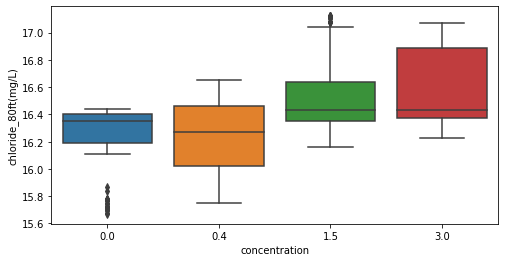

In [8]:
### chloride_80ft(mg/L)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="chloride_80ft(mg/L)", data=datos2, ax=ax)
#sns.swarmplot(x="concentration", y="chloride_80ft(mg/L)", data=datos2, color='black', alpha = 0.5, ax=ax);

In [9]:
### ANOVA: chloride_80ft(mg/L)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="chloride_80ft(mg/L)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,14.299768,3,4.766589,73.04007,4.383459e-40,0.274202
1,Within,37.850754,580,0.065260,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='chloride_1100ft(mg/L)'>

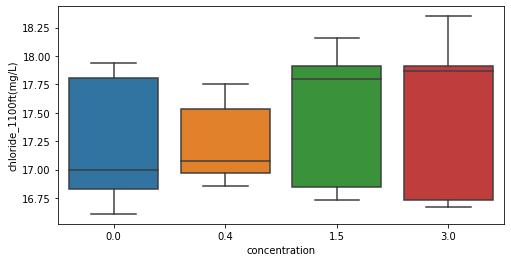

In [11]:
### chloride_1100ft(mg/L)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="chloride_1100ft(mg/L)", data=datos2, ax=ax)

In [12]:
### ANOVA: chloride_1100ft(mg/L)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="chloride_1100ft(mg/L)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,6.472763,3,2.157588,8.813227,0.00001,0.043598
1,Within,141.991221,580,0.244812,NaN,NaN,NaN


### CL2

<AxesSubplot:xlabel='concentration', ylabel='CL2_80ft(PPM)'>

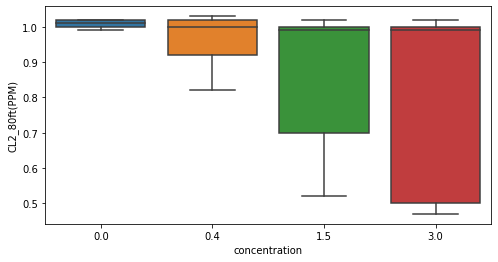

In [14]:
### CL2_80ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="CL2_80ft(PPM)", data=datos2, ax=ax)

In [15]:
### ANOVA: CL2_80ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="CL2_80ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,2.900102,3,0.966701,40.814609,6.097111e-24,0.174311
1,Within,13.737394,580,0.023685,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='CL2_1100ft(PPM)'>

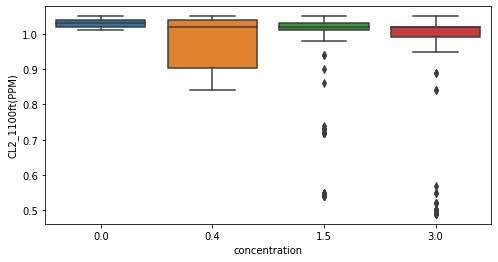

In [16]:
### CL2_1100ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="CL2_1100ft(PPM)", data=datos2, ax=ax)

In [17]:
### ANOVA: CL2_1100ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="CL2_1100ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,1.009890,3,0.33663,19.848624,2.931733e-12,0.093106
1,Within,9.836726,580,0.01696,NaN,NaN,NaN


### DO_YSI

<AxesSubplot:xlabel='concentration', ylabel='DO_YSI_80ft(mg/L)'>

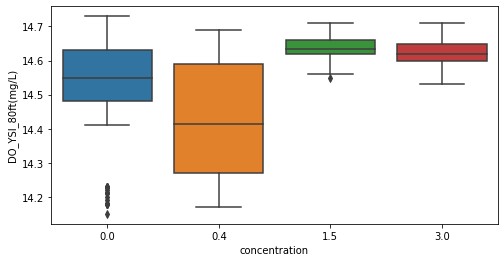

In [18]:
### DO_YSI_80ft(mg/L)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="DO_YSI_80ft(mg/L)", data=datos2, ax=ax)

In [22]:
### ANOVA: DO_YSI_80ft(mg/L)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="DO_YSI_80ft(mg/L)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,4.102637,3,1.367546,105.080301,2.457396e-54,0.35213
1,Within,7.548289,580,0.013014,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='DO_YSI_1100ft(mg/L)'>

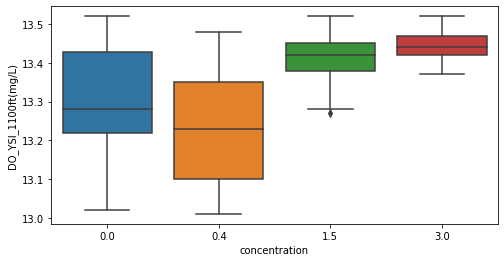

In [20]:
### DO_YSI_1100ft(mg/L)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="DO_YSI_1100ft(mg/L)", data=datos2, ax=ax)

In [23]:
### ANOVA: DO_YSI_1100ft(mg/L)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="DO_YSI_1100ft(mg/L)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,4.260888,3,1.420296,143.410585,1.628853e-69,0.425874
1,Within,5.744149,580,0.009904,NaN,NaN,NaN


### FreeClorine_ATI

<AxesSubplot:xlabel='concentration', ylabel='FreeClorine_ATI_80ft(PPM)'>

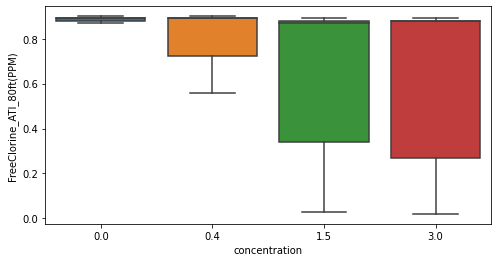

In [24]:
### FreeClorine_ATI_80ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="FreeClorine_ATI_80ft(PPM)", data=datos2, ax=ax)

In [25]:
### ANOVA: FreeClorine_ATI_80ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="FreeClorine_ATI_80ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,6.240795,3,2.080265,32.534848,1.900283e-19,0.144044
1,Within,37.084966,580,0.063940,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='FreeClorine_ATI_1100ft(PPM)'>

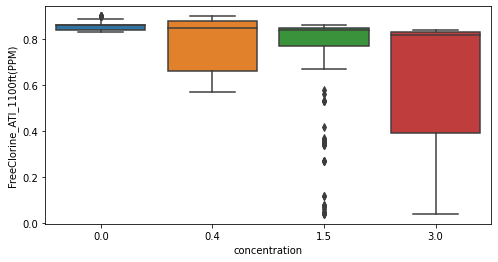

In [26]:
### FreeClorine_ATI_1100ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="FreeClorine_ATI_1100ft(PPM)", data=datos2, ax=ax)

In [27]:
### ANOVA: FreeClorine_ATI_1100ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="FreeClorine_ATI_1100ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,4.177991,3,1.392664,31.394155,8.128171e-19,0.139699
1,Within,25.729151,580,0.044361,NaN,NaN,NaN


### FreeClorine_X

<AxesSubplot:xlabel='concentration', ylabel='FreeClorine_X_80ft(PPM)'>

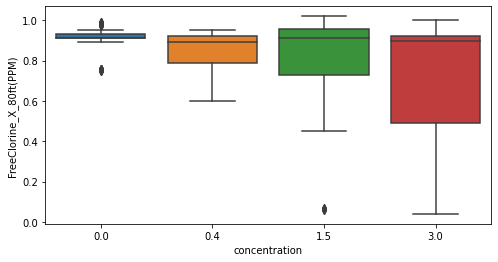

In [28]:
### FreeClorine_X_80ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="FreeClorine_X_80ft(PPM)", data=datos2, ax=ax)

In [29]:
### ANOVA: FreeClorine_X_80ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="FreeClorine_X_80ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,2.132012,3,0.710671,22.463133,9.022204e-14,0.104094
1,Within,18.349579,580,0.031637,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='FreeClorine_X_1100ft(PPM)'>

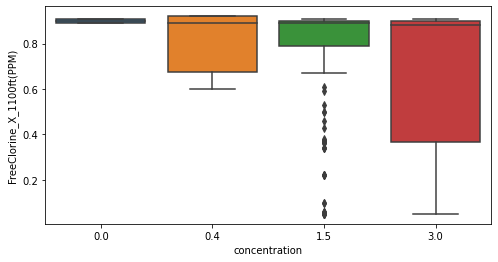

In [30]:
### FreeClorine_X_1100ft(PPM)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="FreeClorine_X_1100ft(PPM)", data=datos2, ax=ax)

In [31]:
### ANOVA: FreeClorine_X_1100ft(PPM)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="FreeClorine_X_1100ft(PPM)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,3.991875,3,1.330625,25.249901,2.297259e-15,0.115516
1,Within,30.564974,580,0.052698,NaN,NaN,NaN


### ORP_YSI

<AxesSubplot:xlabel='concentration', ylabel='ORP_YSI_80ft(mV)'>

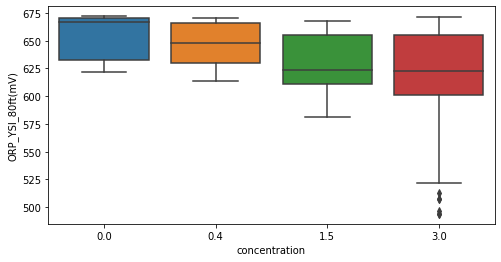

In [32]:
### ORP_YSI_80ft(mV)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="ORP_YSI_80ft(mV)", data=datos2, ax=ax)

In [33]:
### ANOVA: ORP_YSI_80ft(mV)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="ORP_YSI_80ft(mV)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,114941.376712,3,38313.792237,46.88918,3.832382e-27,0.195191
1,Within,473925.958904,580,817.113722,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='ORP_YSI_1100ft(mV)'>

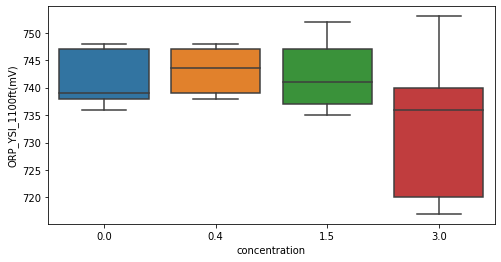

In [34]:
### ORP_YSI_1100ft(mV)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="ORP_YSI_1100ft(mV)", data=datos2, ax=ax)

In [35]:
### ANOVA: ORP_YSI_1100ft(mV)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="ORP_YSI_1100ft(mV)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,10939.595890,3,3646.531963,88.905132,2.427950e-47,0.315
1,Within,23789.273973,580,41.015990,NaN,NaN,NaN


### pH_YSI

<AxesSubplot:xlabel='concentration', ylabel='pH_YSI_80ft'>

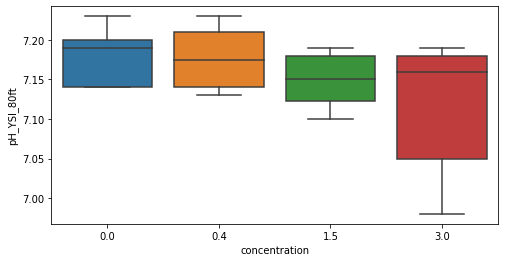

In [36]:
### pH_YSI_80ft
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="pH_YSI_80ft", data=datos2, ax=ax)

In [37]:
### ANOVA: pH_YSI_80ft

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="pH_YSI_80ft", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,0.334490,3,0.111497,47.778507,1.322175e-27,0.198159
1,Within,1.353495,580,0.002334,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='pH_YSI_1100ft'>

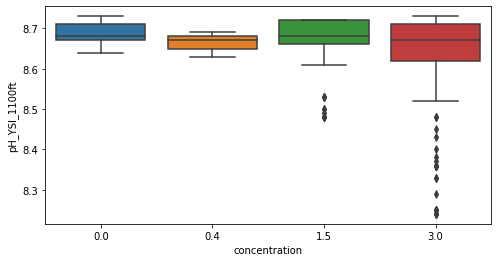

In [38]:
### pH_YSI_1100ft
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="pH_YSI_1100ft", data=datos2, ax=ax)

In [39]:
### ANOVA: pH_YSI_1100ft

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="pH_YSI_1100ft", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,0.326731,3,0.108910,19.315632,5.987258e-12,0.090833
1,Within,3.270301,580,0.005638,NaN,NaN,NaN


### Sp_cond_YSI

<AxesSubplot:xlabel='concentration', ylabel='sp_cond_YSI_80ft(µS/cm)'>

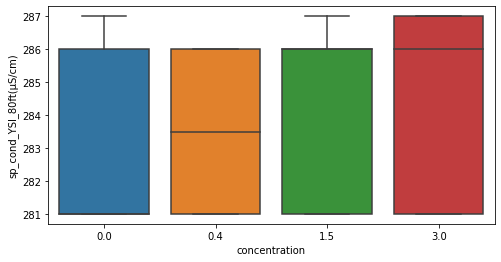

In [40]:
### sp_cond_YSI_80ft(µS/cm)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="sp_cond_YSI_80ft(µS/cm)", data=datos2, ax=ax)

In [41]:
### ANOVA: sp_cond_YSI_80ft(µS/cm)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="sp_cond_YSI_80ft(µS/cm)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,54.388699,3,18.129566,2.71754,0.043934,0.013861
1,Within,3869.363014,580,6.671316,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='sp_cond_YSI_1100ft(µS/cm)'>

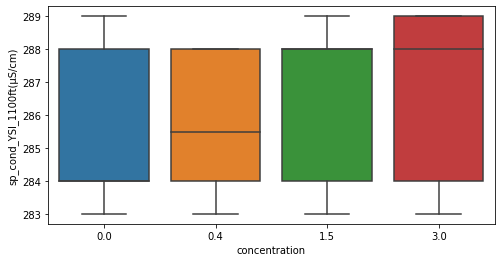

In [42]:
### sp_cond_YSI_1100ft(µS/cm)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="sp_cond_YSI_1100ft(µS/cm)", data=datos2, ax=ax)

In [43]:
### ANOVA: sp_cond_YSI_1100ft(µS/cm)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="sp_cond_YSI_1100ft(µS/cm)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,29.950342,3,9.983447,1.989533,0.114406,0.010186
1,Within,2910.431507,580,5.017985,NaN,NaN,NaN


### Turbidity YSI

<AxesSubplot:xlabel='concentration', ylabel='turbidity_YSI_80ft(NTU+)'>

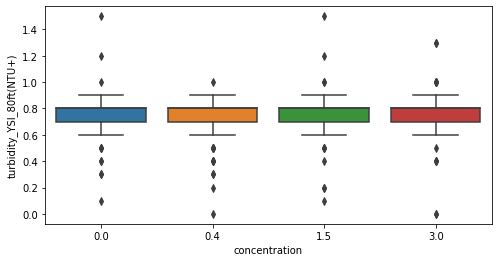

In [44]:
### turbidity_YSI_80ft(NTU+)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="turbidity_YSI_80ft(NTU+)", data=datos2, ax=ax)

In [45]:
### ANOVA: turbidity_YSI_80ft(NTU+)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="turbidity_YSI_80ft(NTU+)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,0.034863,3,0.011621,0.60153,0.614208,0.003102
1,Within,11.205068,580,0.019319,NaN,NaN,NaN


<AxesSubplot:xlabel='concentration', ylabel='turbidity_YSI_1100ft(NTU+)'>

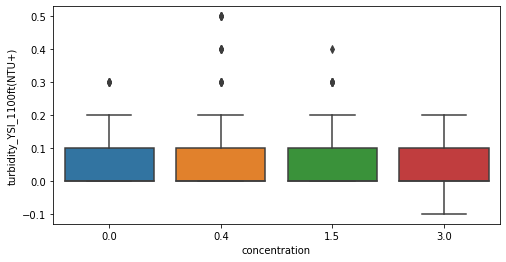

In [46]:
### turbidity_YSI_1100ft(NTU+)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="concentration", y="turbidity_YSI_1100ft(NTU+)", data=datos2, ax=ax)

In [47]:
### ANOVA: turbidity_YSI_1100ft(NTU+)

# Se genera ANOVA a partir de la libreria Pingouin
pg.anova(data=datos2, dv="turbidity_YSI_1100ft(NTU+)", between="concentration", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,concentration,0.248818,3,0.082939,8.353235,0.000019,0.041417
1,Within,5.758836,580,0.009929,NaN,NaN,NaN
